# Test Systems

Uses REBOUND commit 6fb912f615ca542b670ab591375191d1ed914672

Test trained models on real non-resonant systems

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import rebound
import dask.dataframe as dd
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.style.use('paper.mplstyle')
%matplotlib inline

In [3]:
path = '../data/nonressystems/Kepler-431/simulation_archives/runs/'

In [54]:
from celmech import Andoyer

def get_k(row):
    sa = rebound.SimulationArchive(path+'sa'+row['runstring'])
    sim = sa[0]
    p2 = sim.particles[2]
    row['h'] = p2.e*np.sin(p2.pomega)
    row['k'] = p2.e*np.cos(p2.pomega)
    avars = Andoyer.from_Simulation(sim, a10=sim.particles[1].a, j=5, k=1, i1=1, i2=2, average=False)
    row['Z12'] = avars.Z
    row['Zcom12'] = avars.Zcom
    avars = Andoyer.from_Simulation(sim, a10=sim.particles[1].a, j=4, k=1, i1=2, i2=3, average=False)
    row['Z23'] = avars.Z
    row['Zcom23'] = avars.Zcom
    row['e2'] = sim.particles[2].e
    row['e3'] = sim.particles[3].e
    return row

In [55]:
trainpath = '../training_data/nonressystems/Kepler-431/featuresNorbits10000.0Nout80trio/'
labels = pd.read_csv(trainpath + 'labels.csv', index_col=0)
# Create k and h columns for plotting
labels['k'] = 0.
labels['h'] = 0.
labels['Z12'] = 0.
labels['Zcom12'] = 0.
labels['Z23'] = 0.
labels['Zcom23'] = 0.
labels['e2'] = 0.
labels['e3'] = 0.

In [56]:
%%time
dasklabels = dd.from_pandas(labels, npartitions=24)
df = dasklabels.apply(get_k, axis=1, meta=labels).compute(scheduler='processes')

CPU times: user 333 ms, sys: 649 ms, total: 982 ms
Wall time: 1.98 s


In [7]:
def pred(row):
    sa = rebound.SimulationArchive(path+'sa'+row['runstring'])
    sim = sa[0]
    sim.dt = 0.07*sim.particles[1].P
    row['probstability'] = model.predict(sim, copy=False)
    return row

In [9]:
from spock import StabilityClassifier
model = StabilityClassifier()

# df is a regular pandas dataframe. Calculate how long it takes to evaluate stability on all

In [10]:
%%time
df.apply(pred, axis=1)

CPU times: user 3h 32min 11s, sys: 4min 30s, total: 3h 36min 42s
Wall time: 19min 17s


,runstring,instability_time,shadow_instability_time,Stable,k,h,Z12,Zcom12,Z23,Zcom23,probstability
0,0000000.bin,7.485924e+01,1.060708e+02,False,0.005465,0.000371,0.119594,0.136491,0.003560,0.001432,0.000000
1,0000001.bin,9.990000e+08,9.990000e+08,True,-0.003233,0.001987,0.002996,0.004223,0.014028,0.013678,0.962950
2,0000002.bin,9.990000e+08,9.990000e+08,True,0.002167,-0.006424,0.024153,0.006959,0.004783,0.001058,0.998962
3,0000003.bin,1.648912e+01,1.648912e+01,False,-0.003925,-0.016795,0.038200,0.039534,0.161763,0.209095,0.000000
4,0000004.bin,9.990000e+08,9.990000e+08,True,-0.000006,0.000600,0.000473,0.000084,0.017975,0.025508,0.971723
5,0000005.bin,1.000000e+09,1.000000e+09,True,-0.002064,0.002486,0.028242,0.021443,0.001448,0.002433,0.998935
6,0000006.bin,1.386469e+04,1.883706e+05,False,-0.103164,0.062813,0.083021,0.114731,0.079027,0.051388,0.004611
7,0000007.bin,9.990000e+08,9.990000e+08,True,0.000307,-0.000886,0.000799,0.000311,0.000637,0.000412,0.998851
8,0000008.bin,9.990000e+08,9.990000e+08,True,-0.001735,0.000292,0.001328,0.000071,0.001205,0.000057,0.997661
9,0000009.bin,9.990000e+08,9.990000e+08,True,0.009040,-0.004732,0.007526,0.008119,0.007665,0.004156,0.964488


In [15]:
df = _

In [44]:
%%time
threshold=0.79
proba = df['probstability'].values
stablemask = df['Stable'] == True
unstablemask = df['Stable'] == False
pstablemask = proba > threshold
punstablemask = proba < threshold

CPU times: user 1.92 ms, sys: 41 µs, total: 1.96 ms
Wall time: 1.83 ms


In [45]:
stablemask.sum()

1095

In [46]:
unstablemask.sum()

405

# TPR

In [47]:
(stablemask & pstablemask).sum()/stablemask.sum()

0.9470319634703196

# FPR

In [48]:
1-(unstablemask & punstablemask).sum()/unstablemask.sum()

0.07901234567901239

In [49]:
(unstablemask & punstablemask).sum()/unstablemask.sum()

0.9209876543209876

# Fraction that agree

In [50]:
((stablemask & pstablemask).sum() + (unstablemask & punstablemask).sum())/(stablemask.sum() + unstablemask.sum())

0.94

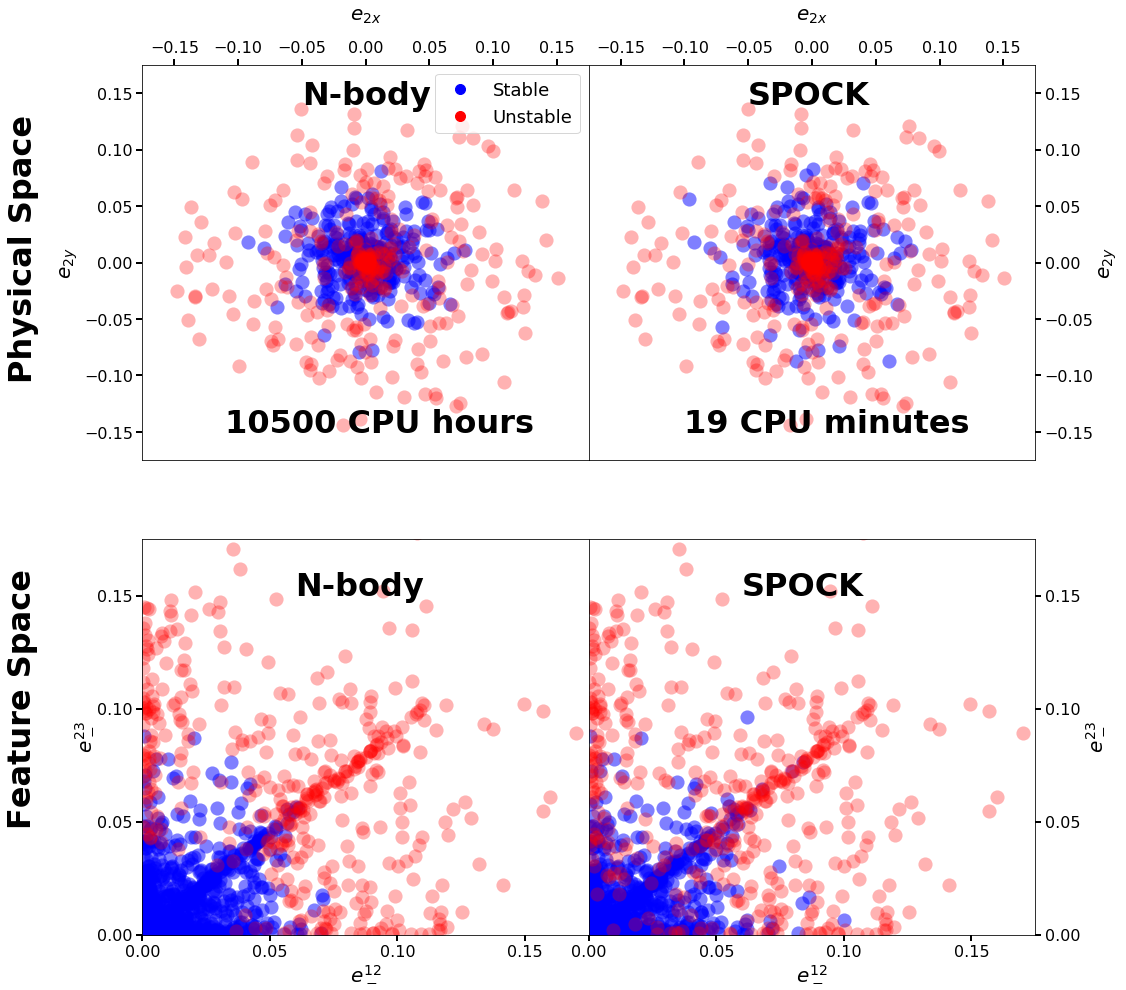

In [68]:
from matplotlib.lines import Line2D

fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=[16, 16])
plt.subplots_adjust(wspace=0)
for ax in axarr.flatten():
    ax.set_rasterization_zorder(1)
s=200
axarr[0,0].scatter(df["k"][stablemask], df["h"][stablemask], c='b', s=s, lw=0, label='Stable', alpha=0.5, zorder=0)
axarr[0,0].scatter(df["k"][unstablemask], df["h"][unstablemask], c='r', s=s, lw=0, label='Unstable', alpha=0.3, zorder=0)
axarr[0,1].scatter(df["k"][pstablemask], df["h"][pstablemask], c='b', s=s, lw=0, label='Stable', alpha=0.5, zorder=0)
axarr[0,1].scatter(df["k"][punstablemask], df["h"][punstablemask], c='r', s=s, lw=0, label='Unstable', alpha=0.3, zorder=0)
axarr[0,1].tick_params(axis='y', which='both', left='off', right='off')
axarr[0,0].text(-0.11, -0.15, '10500 CPU hours', weight='bold', size=32, color='black')
axarr[0,1].text(-0.1, -0.15, '19 CPU minutes', weight='bold', size=32, color='black')
axarr[0,0].text(-0.05, 0.14, 'N-body', weight='bold', size=32)
axarr[0,1].text(-0.05, 0.14, 'SPOCK', weight='bold', size=32)
axarr[0,0].text(-0.28, -0.1, 'Physical Space', weight='bold', size=32, rotation=90)

lim = 0.175
axarr[0,0].set_xlim([-lim, lim])
axarr[0,0].set_ylim([-lim, lim])
axarr[0,1].set_xlim([-lim, lim])
axarr[0,1].set_ylim([-lim, lim])

legend_elements = [Line2D([0], [0], marker='o', lw=0, c='b', markerfacecolor='b', label='Stable', markersize=10),
                   Line2D([0], [0], marker='o', lw=0, c='r', markerfacecolor='r', label='Unstable', markersize=10)]
axarr[0,0].legend(handles=legend_elements, loc='upper right', fontsize=18)


axarr[0,1].yaxis.tick_right()
axarr[0,0].xaxis.tick_top()
axarr[0,1].xaxis.tick_top()

axarr[0,0].set_xlabel(r'$e_{2x}$', labelpad=20)
axarr[0,0].set_ylabel(r'$e_{2y}$')
axarr[0,1].set_xlabel(r'$e_{2x}$', labelpad=20)
axarr[0,1].set_ylabel(r'$e_{2y}$')
axarr[0,1].yaxis.set_label_position("right")
axarr[0,0].xaxis.set_label_position("top")
axarr[0,1].xaxis.set_label_position("top")

s=200
axarr[1,0].scatter(df["Z12"][stablemask], df["Z23"][stablemask], c='b', s=s, lw=0, label='Stable', alpha=0.5, zorder=0)
axarr[1,0].scatter(df["Z12"][unstablemask], df["Z23"][unstablemask], c='r', s=s, lw=0, label='Unstable', alpha=0.3, zorder=0)
axarr[1,1].scatter(df["Z12"][pstablemask], df["Z23"][pstablemask], c='b', s=s, lw=0, label='Stable', alpha=0.5, zorder=0)
axarr[1,1].scatter(df["Z12"][punstablemask], df["Z23"][punstablemask], c='r', s=s, lw=0, label='Unstable', alpha=0.3, zorder=0)
axarr[1,1].tick_params(axis='y', which='both', left='off', right='off')
axarr[1,0].text(0.06, 0.15, 'N-body', weight='bold', size=32)
axarr[1,1].text(0.06, 0.15, 'SPOCK', weight='bold', size=32)
axarr[1,0].text(-0.053, 0.05, 'Feature Space', weight='bold', size=32, rotation=90)

axarr[1,0].set_xlim([0, lim])
axarr[1,0].set_ylim([0, lim])
axarr[1,1].set_xlim([0, lim])
axarr[1,1].set_ylim([0, lim])
axarr[1,0].set_xticks([0, 0.05, 0.1, 0.15])
axarr[1,0].set_yticks([0, 0.05, 0.1, 0.15])
axarr[1,1].set_xticks([0, 0.05, 0.1, 0.15])
axarr[1,1].set_yticks([0, 0.05, 0.1, 0.15])
axarr[1,1].yaxis.tick_right()
axarr[1,1].yaxis.set_label_position("right")

axarr[1,0].set_xlabel(r'$e_-^{12}$')
axarr[1,0].set_ylabel(r'$e_-^{23}$')
axarr[1,1].set_xlabel(r'$e_-^{12}$')
axarr[1,1].set_ylabel(r'$e_-^{23}$')

fig.savefig('kep431.pdf', bbox_inches='tight')